In [1]:
%%writefile testutility.py
import logging
import os
import subprocess
import yaml
import pandas as pd
import datetime 
import gc
import re

def read_yml_file(file_path):
    with open(file_path, 'r') as stream:
        try:
            return yaml.safe_load(stream)
        except yaml.YAMLError as exc:
            logging.error(exc)

def replacer(string, char):
    pattern = char + '{2,}'
    string = re.sub(pattern, char, string)
    return string

def col_validate(df, col_config):
    cols = df.columns
    cols = cols.str.strip()
    cols.str.replace("_", "")
    cols = list(map(lambda x: replacer(x, ' '), list(cols)))
    expected_col = list(map(lambda x: x.lower(),  col_config['columns']))
    cols.sort()
    expected_col.sort()
    if len(cols) == len(expected_col) and cols == expected_col:
        print("Column name and Column length Validation Passed!!")
        return 1
    else:
        print("Column name and Column length Validation Failed..")
        mismatched_columns_file = list(set(cols).difference(expected_col))
        print("Following File columns are not in the YAML file", mismatched_columns_file)
        missing_YAML_file = list(set(expected_col).difference(cols))
        print("Following YAML columns are not in the file uploaded", missing_YAML_file)
        logging.info(f'df columns: {cols}')
        logging.info(f'expected columns: {expected_col}')
        return 0

# Function to get the size of dataset
def humanbytes(B):
    'Return the given bytes as a human friendly KB, MB, GB, or TB string'
    B = float(B)
    KB = float(1024)
    MB = float(KB ** 2) # 1,048,576
    GB = float(KB ** 3) # 1,073,741,824
    TB = float(KB ** 4) # 1,099,511,627,776

    if B < KB:
        return '{0} {1}'.format(B,'Bytes' if 0 == B > 1 else 'Byte')
    elif KB <= B < MB:
        return '{0:.2f} KB'.format(B/KB)
    elif MB <= B < GB:
        return '{0:.2f} MB'.format(B/MB)
    elif GB <= B < TB:
        return '{0:.2f} GB'.format(B/GB)
    elif TB <= B:
        return '{0:.2f} TB'.format(B/TB)

Overwriting testutility.py


In [2]:
%%writefile file.yaml
columns: 
  - annotation
  - content
dataset_name: resumes
dtypes: 
    annotation: list
    content: str
file_name: Resume
file_type: json
skip_leading_rows: 1
table_name: resumes

Overwriting file.yaml


# Reading Config File 

In [3]:
# Read config file
import testutility as util
col_config = util.read_yml_file("file.yaml")

In [4]:
col_config


{'columns': ['annotation', 'content'],
 'dataset_name': 'resumes',
 'dtypes': {'annotation': 'list', 'content': 'str'},
 'file_name': 'Resume',
 'file_type': 'json',
 'skip_leading_rows': 1,
 'table_name': 'resumes'}

In [5]:
# Read the file using yaml config file
file_type = col_config['file_type']
source_file = col_config['file_name'] + f'.{file_type}'
source_file

'Resume.json'

In [6]:
import pandas as pd

df = pd.read_json('Resume.json', lines=True)
df.to_csv('dataframe.csv', index = None)
df.head()

,content,annotation
0,Govardhana K\nSenior Software Engineer\n\nBeng...,"[{'label': ['Companies worked at'], 'points': ..."
1,"Harini Komaravelli\nTest Analyst at Oracle, Hy...","[{'label': ['Companies worked at'], 'points': ..."
2,Hartej Kathuria\nData Analyst Intern - Oracle ...,"[{'label': ['Skills'], 'points': [{'start': 22..."
3,Ijas Nizamuddin\nAssociate Consultant - State ...,"[{'label': ['Skills'], 'points': [{'start': 46..."
4,"Imgeeyaul Ansari\njava developer\n\nPune, Maha...","[{'label': ['Skills'], 'points': [{'start': 18..."


In [7]:
# Getting the size of the dataset
size = df.memory_usage(deep=True).sum()
file_size = util.humanbytes(size)
print(file_size)

1.41 MB


In [8]:
df.shape

(200, 2)

In [9]:
df.isnull().sum()

content       0
annotation    0
dtype: int64

In [10]:
df['annotation'][0]


[{'label': ['Companies worked at'],
  'points': [{'start': 1749, 'end': 1754, 'text': 'Oracle'}]},
 {'label': ['Companies worked at'],
  'points': [{'start': 1696, 'end': 1701, 'text': 'Oracle'}]},
 {'label': ['Companies worked at'],
  'points': [{'start': 1417, 'end': 1422, 'text': 'Oracle'}]},
 {'label': ['Skills'],
  'points': [{'start': 1356,
    'end': 1792,
    'text': 'Languages: Core Java, Go Lang, Data Structures & Algorithms, Oracle\nPL-SQL programming, Sales Force with APEX.\nTools: RADTool, Jdeveloper, NetBeans, Eclipse, SQL developer,\nPL/SQL Developer, WinSCP, Putty\nWeb Technologies: JavaScript, XML, HTML, Webservice\n\nOperating Systems: Linux, Windows\nVersion control system SVN & Git-Hub\nDatabases: Oracle\nMiddleware: Web logic, OC4J\nProduct FLEXCUBE: Oracle FLEXCUBE Versions 10.x, 11.x and 12.x'}]},
 {'label': ['Companies worked at'],
  'points': [{'start': 1209, 'end': 1214, 'text': 'Oracle'}]},
 {'label': ['Skills'],
  'points': [{'start': 1136,
    'end': 1247,


In [11]:
df['content'][0]


'Govardhana K\nSenior Software Engineer\n\nBengaluru, Karnataka, Karnataka - Email me on Indeed: indeed.com/r/Govardhana-K/\nb2de315d95905b68\n\nTotal IT experience 5 Years 6 Months\nCloud Lending Solutions INC 4 Month • Salesforce Developer\nOracle 5 Years 2 Month • Core Java Developer\nLanguages Core Java, Go Lang\nOracle PL-SQL programming,\nSales Force Developer with APEX.\n\nDesignations & Promotions\n\nWilling to relocate: Anywhere\n\nWORK EXPERIENCE\n\nSenior Software Engineer\n\nCloud Lending Solutions -  Bangalore, Karnataka -\n\nJanuary 2018 to Present\n\nPresent\n\nSenior Consultant\n\nOracle -  Bangalore, Karnataka -\n\nNovember 2016 to December 2017\n\nStaff Consultant\n\nOracle -  Bangalore, Karnataka -\n\nJanuary 2014 to October 2016\n\nAssociate Consultant\n\nOracle -  Bangalore, Karnataka -\n\nNovember 2012 to December 2013\n\nEDUCATION\n\nB.E in Computer Science Engineering\n\nAdithya Institute of Technology -  Tamil Nadu\n\nSeptember 2008 to June 2012\n\nhttps://www.

In [12]:
if util.col_validate(df, col_config) == 0:
    print("Validation Failed!!")
else:
    print("Column Validation Passed..")

Column name and Column length Validation Passed!!
Column Validation Passed..


# Cleaning Data

In [13]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
!pip install num2words
from num2words import num2words
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Text cleaning function
def clean_text(resume):
    
    resume = resume.lower()  #lower-casing all the characters
    
    resume = expand_contractions(resume)  #expanding any contractions
    
    # removing all the unnecessary characters
    resume = re.sub("\n", ' ', resume)
    resume = re.sub(r'[,•()➢❑]', ' ', resume)
    resume = re.sub(r'\s\s+|\s-\s|\.\s', ' ', resume)
    
    # tokenizing words using spaces to avoid losing important information such as the emails
    tokenized_words = resume.split(" ")
    
    #length = len(tokenized_words)
    #for i in range(length):
     #   if tokenized_words[i].isdigit():
      #      tokenized_words[i] = num2words(tokenized_words[i])
    
    
    # removing stop words
    sw = set(stopwords.words('english'))
    
    tokens_without_sw = []
    
    for w in tokenized_words:
        if w not in sw:
            tokens_without_sw.append(w)
    
    # lemmatizing words
    lm = WordNetLemmatizer() 
    tokens_without_sw = [lm.lemmatize(word) for word in tokens_without_sw if not word in set(sw)]
    
    # joining all words to get one full string
    final_resume = " ".join(tokens_without_sw)
    
    return final_resume

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
resume_content = df['content']

resume_content

0      Govardhana K\nSenior Software Engineer\n\nBeng...
1      Harini Komaravelli\nTest Analyst at Oracle, Hy...
2      Hartej Kathuria\nData Analyst Intern - Oracle ...
3      Ijas Nizamuddin\nAssociate Consultant - State ...
4      Imgeeyaul Ansari\njava developer\n\nPune, Maha...
                             ...                        
195    Mansi Thanki\nStudent\n\nJamnagar, Gujarat - E...
196    Anil Kumar\nMicrosoft Azure (Basic Management)...
197    Siddharth Choudhary\nMicrosoft Office Suite - ...
198    Valarmathi Dhandapani\nInvestment Banking Oper...
199    Pradeep Kumar\nSecurity Analyst in Infosys - C...
Name: content, Length: 200, dtype: object

In [15]:
dict = {'content':[]}
clean_resumes = pd.DataFrame(dict)

for resume in resume_content:
    clean_resumes.loc[len(clean_resumes.index)] = clean_text(resume) 
    
    
clean_resumes

,content
0,govardhana k senior software engineer bengalur...
1,harini komaravelli test analyst oracle hyderab...
2,hartej kathuria data analyst intern oracle ret...
3,ijas nizamuddin associate consultant state str...
4,imgeeyaul ansari java developer pune maharasht...
...,...
195,mansi thanki student jamnagar gujarat email in...
196,anil kumar microsoft azure basic management de...
197,siddharth choudhary microsoft office suite exp...
198,valarmathi dhandapani investment banking opera...


In [16]:
clean_resumes['content'][0]


'govardhana k senior software engineer bengaluru karnataka karnataka email indeed: indeed.com/r/govardhana-k/ b2de315d95905b68 total experience 5 year 6 month cloud lending solution inc 4 month salesforce developer oracle 5 year 2 month core java developer language core java go lang oracle pl-sql programming sale force developer apex  designation & promotion willing relocate: anywhere work experience senior software engineer cloud lending solution  bangalore karnataka  january 2018 present present senior consultant oracle  bangalore karnataka  november 2016 december 2017 staff consultant oracle  bangalore karnataka  january 2014 october 2016 associate consultant oracle  bangalore karnataka  november 2012 december 2013 education b.e computer science engineering adithya institute technology  tamil nadu september 2008 june 2012 https://www.indeed.com/r/govardhana-k/b2de315d95905b68?isid=rex-download&ikw=download-top&co=in https://www.indeed.com/r/govardhana-k/b2de315d95905b68?isid=rex-dow

In [17]:
clean_resumes['content'][154]


"jacob philip kottayam kerala email indeed: indeed.com/r/jacob-philip/db00d831146c9228 strategicsales experienceinsales skills.currently success  work experience sale marketing specialist assistantbusinessdevelopmentmanager  dubai ae  february 2017 october 2017 uae -builtstrong clientrelationshipsandprovidedhighvalue-addingservices resultingina15% company marketshareincrease developstools practicesacrosstheorganization negotiatingcontractsandpackages negotiatingthetermsofanagreementwithaviewto closingsale expense andnew businessdata workedcloselywithpartners throughconductingqualityassurancetests.actasthepointofcontactandcommunicate projectstatustoallparticipantsinourteam ordinator marketingco  january 2015 june 2016 bhimajewelers kerala india systemreportforms plannedandexecutedeventsandmarketingprograms producingfivetimestargetnumberof qualifiedleads implement marketing advertising campaign assembling analyzing sale forecastsandincreasedperformanceby52percent preparesmarketingreports

In [18]:
clean_resumes.drop([154], axis = 0, inplace = True)


# Featurization Using Tf-Idf


In [19]:
### We use the Tf-Idf vectorizer to gain insights about the probabilities of all the possible words and collocations
### we can find in these reusmes.
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(ngram_range = (1, 3))
tf_idf = vect.fit_transform(clean_resumes['content'])
terms = vect.get_feature_names()
#print(terms)
print(tf_idf)

  (0, 459)	0.04099920254609702
  (0, 360)	0.04099920254609702
  (0, 178)	0.03803341461440172
  (0, 116439)	0.04099920254609702
  (0, 44280)	0.04099920254609702
  (0, 74526)	0.04099920254609702
  (0, 44277)	0.04099920254609702
  (0, 82309)	0.04099920254609702
  (0, 72772)	0.04099920254609702
  (0, 62767)	0.04099920254609702
  (0, 117792)	0.04099920254609702
  (0, 68239)	0.04099920254609702
  (0, 74606)	0.04099920254609702
  (0, 30160)	0.04099920254609702
  (0, 50198)	0.04099920254609702
  (0, 46566)	0.04099920254609702
  (0, 104470)	0.04099920254609702
  (0, 105218)	0.04099920254609702
  (0, 26164)	0.04099920254609702
  (0, 116449)	0.035929154589110036
  (0, 118658)	0.03803341461440172
  (0, 62247)	0.03803341461440172
  (0, 105334)	0.035929154589110036
  (0, 73924)	0.03085910663212305
  (0, 117964)	0.04099920254609702
  :	:
  (198, 119196)	0.006696917115165575
  (198, 52504)	0.020090751345496725
  (198, 52688)	0.006696917115165575
  (198, 37486)	0.006696917115165575
  (198, 107278)	0.02

C:\Users\sanja\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# POS TAGGING

In [20]:
!pip install spacy

In [71]:
!python -m spacy download en_core_web_md


     ---------------------------------------- 0.0/42.8 MB ? eta -:--:--
     -- ------------------------------------- 2.4/42.8 MB 21.9 MB/s eta 0:00:02
     --- ------------------------------------ 4.1/42.8 MB 26.3 MB/s eta 0:00:02
     ----- ---------------------------------- 5.6/42.8 MB 27.4 MB/s eta 0:00:02
     ------ --------------------------------- 7.3/42.8 MB 29.3 MB/s eta 0:00:02
     -------- ------------------------------- 8.8/42.8 MB 29.7 MB/s eta 0:00:02
     --------- ----------------------------- 10.4/42.8 MB 31.2 MB/s eta 0:00:02
     ---------- ---------------------------- 12.0/42.8 MB 32.7 MB/s eta 0:00:01
     ------------ -------------------------- 13.4/42.8 MB 32.8 MB/s eta 0:00:01
     ------------- ------------------------- 15.2/42.8 MB 32.8 MB/s eta 0:00:01
     --------------- ----------------------- 16.8/42.8 MB 34.4 MB/s eta 0:00:01
     ----------------- --------------------- 18.9/42.8 MB 34.4 MB/s eta 0:00:01
     ------------------ -------------------- 20.

# Using NLTK Library of Part of Speech


In [21]:
#!pip install spacy
import spacy
nlp = spacy.load("en_core_web_sm")


C:\Users\sanja\anaconda3\lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.5.0) was trained with spaCy v3.5.0 and may not be 100% compatible with the current version (3.7.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
C:\Users\sanja\anaconda3\lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
C:\Users\sanja\anaconda3\lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [22]:
!python.exe -m pip install --upgrade pip

In [23]:
import spacy
import en_core_web_md

# load en_core_web_md of English for vocabluary, syntax & entities
nlp = en_core_web_md.load()

#  "nlp" Object used to create documents with linguistic annotations.
tags = nlp(clean_resumes['content'][100])

for word in tags:
    print(word.text, word.pos_)

puneet ADJ
bhandari PROPN
sap PROPN
sd PROPN
lead VERB
microsoft PROPN
pune PROPN
maharashtra PROPN
email PROPN
indeed ADV
: PUNCT
indeed.com/r/puneet-bhandari/c9002fa44d6760bd PROPN
willing ADJ
relocate NOUN
: PUNCT
anywhere ADV
work NOUN
experience NOUN
sap PROPN
sd PROPN
lead VERB
microsoft PROPN
  SPACE
august PROPN
2010 NUM
present ADJ
team NOUN
size NOUN
: PUNCT
8 NUM
duration NOUN
: PUNCT
seven NUM
month NOUN
scope NOUN
: PUNCT
* PUNCT
enhancement PROPN
mexico PROPN
invoicing NOUN
process NOUN
per ADP
current ADJ
regulation NOUN
* PUNCT
requirement NOUN
gathering VERB
third ADJ
party NOUN
client NOUN
new ADJ
process NOUN
* PUNCT
responsible ADJ
implementing VERB
change NOUN
system NOUN
area NOUN
exposure NOUN
: PUNCT
* PUNCT
understand VERB
as ADP
- PUNCT
is AUX
process NOUN
develop VERB
to- DET
design NOUN
document NOUN
meet VERB
business NOUN
government NOUN
requirement NOUN
* PUNCT
requirement NOUN
gathering NOUN
sd PROPN
process PROPN
client NOUN
* CCONJ
developed VERB
solut

# Exploratory Data Analysis

In [24]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
len(clean_resumes)


199

In [26]:
clean_resumes.describe()


,content
count,199
unique,198
top,sameer kujur orrisha email indeed: indeed.com/...
freq,2


In [27]:
clean_resumes = clean_resumes.drop_duplicates()
clean_resumes


,content
0,govardhana k senior software engineer bengalur...
1,harini komaravelli test analyst oracle hyderab...
2,hartej kathuria data analyst intern oracle ret...
3,ijas nizamuddin associate consultant state str...
4,imgeeyaul ansari java developer pune maharasht...
...,...
195,mansi thanki student jamnagar gujarat email in...
196,anil kumar microsoft azure basic management de...
197,siddharth choudhary microsoft office suite exp...
198,valarmathi dhandapani investment banking opera...


In [28]:
def get_avg_word_len(x):
  words = x.split()
  word_len = 0
  for word in words:
    word_len += len(word)
  return word_len / len(words)

In [29]:
clean_resumes['avg_word_len'] = clean_resumes['content'].apply(lambda x: get_avg_word_len(x))


C:\Users\sanja\AppData\Local\Temp\ipykernel_21176\2463490833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_resumes['avg_word_len'] = clean_resumes['content'].apply(lambda x: get_avg_word_len(x))


In [30]:
clean_resumes['content_len'] = clean_resumes['content'].apply(lambda x: len(x))


C:\Users\sanja\AppData\Local\Temp\ipykernel_21176\2397035709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_resumes['content_len'] = clean_resumes['content'].apply(lambda x: len(x))


In [31]:
clean_resumes['word_count'] = clean_resumes['content'].apply(lambda x: len(x.split()))


C:\Users\sanja\AppData\Local\Temp\ipykernel_21176\2584257991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_resumes['word_count'] = clean_resumes['content'].apply(lambda x: len(x.split()))


In [32]:
clean_resumes.head()


,content,avg_word_len,content_len,word_count
0,govardhana k senior software engineer bengalur...,7.768421,1676,190
1,harini komaravelli test analyst oracle hyderab...,7.246679,4372,527
2,hartej kathuria data analyst intern oracle ret...,6.760870,2144,276
3,ijas nizamuddin associate consultant state str...,7.263043,3812,460
4,imgeeyaul ansari java developer pune maharasht...,6.456790,1826,243


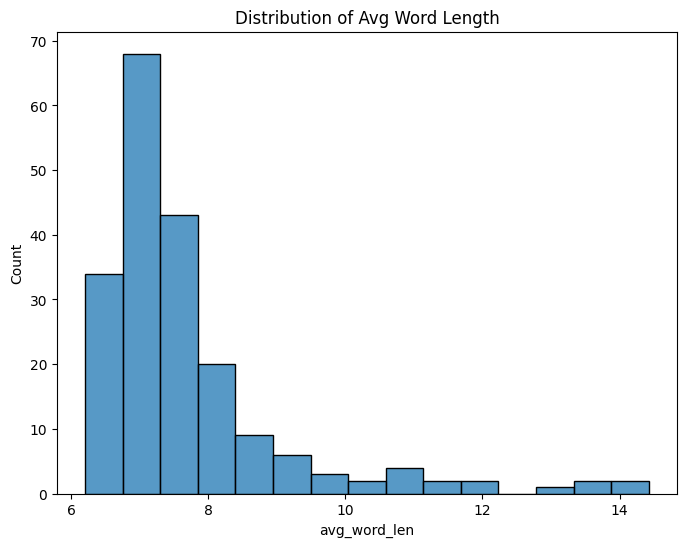

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(clean_resumes['avg_word_len'], bins=15);
plt.title('Distribution of Avg Word Length')
plt.show()

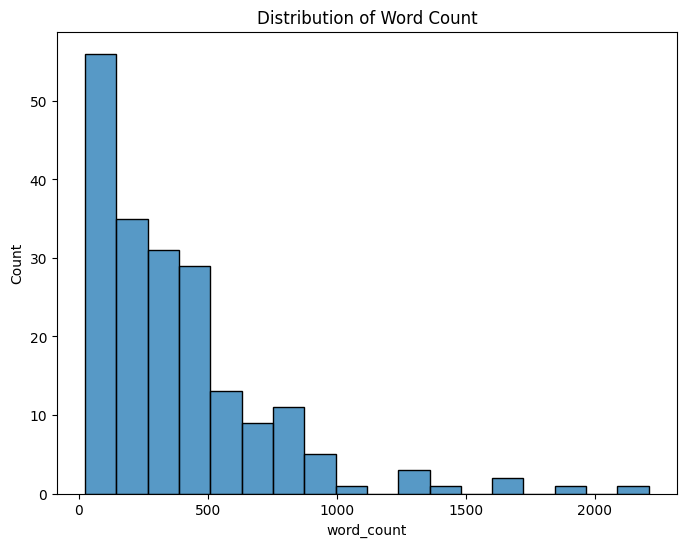

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(clean_resumes['word_count']);
plt.title('Distribution of Word Count')
plt.show()

# Distribution of Unigram, Bigram & Trigram

In [35]:
from sklearn.feature_extraction.text import CountVectorizer


In [36]:
def get_top_n_words(x, n):
  vec = CountVectorizer().fit(x)
  bow = vec.transform(x)
  sum_words = bow.sum(axis = 0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
  return words_freq[:n]

In [37]:
words = get_top_n_words(clean_resumes['content'], 50)


In [38]:
words

[('indeed', 672),
 ('year', 649),
 ('management', 629),
 ('project', 609),
 ('com', 564),
 ('download', 557),
 ('team', 542),
 ('experience', 521),
 ('application', 481),
 ('system', 452),
 ('skill', 439),
 ('testing', 421),
 ('microsoft', 420),
 ('work', 419),
 ('client', 401),
 ('test', 393),
 ('data', 385),
 ('service', 366),
 ('using', 366),
 ('in', 339),
 ('support', 321),
 ('https', 313),
 ('www', 313),
 ('co', 310),
 ('customer', 309),
 ('oracle', 303),
 ('tool', 300),
 ('business', 297),
 ('server', 296),
 ('technology', 291),
 ('process', 290),
 ('technical', 289),
 ('top', 287),
 ('software', 275),
 ('isid', 275),
 ('rex', 275),
 ('ikw', 275),
 ('report', 275),
 ('issue', 261),
 ('sap', 258),
 ('development', 255),
 ('engineer', 251),
 ('sql', 245),
 ('email', 233),
 ('information', 233),
 ('infosys', 230),
 ('knowledge', 227),
 ('worked', 223),
 ('requirement', 222),
 ('education', 219)]

In [39]:
df1 = pd.DataFrame(words, columns = ['Unigram', 'Frequency'])
df1

,Unigram,Frequency
0,indeed,672
1,year,649
2,management,629
3,project,609
4,com,564
5,download,557
6,team,542
7,experience,521
8,application,481
9,system,452


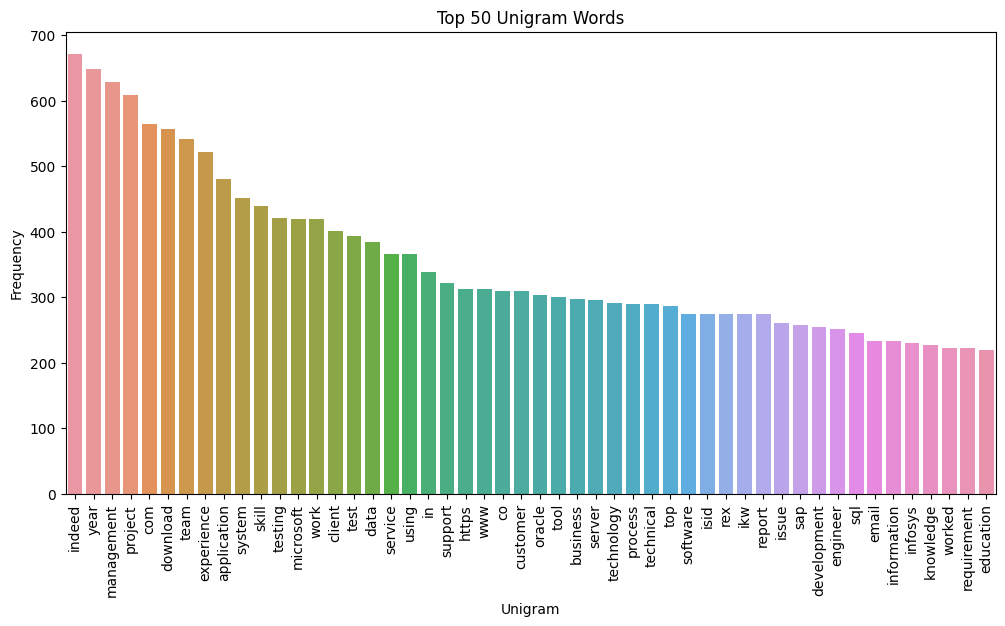

In [40]:
plt.figure(figsize = (12, 6))
g = sns.barplot(data = df1, x = 'Unigram', y = 'Frequency');
g.set_xticklabels(df1['Unigram'], rotation=90)
plt.title('Top 50 Unigram Words')
plt.show()

# Bigram

In [41]:
def get_top_n_words(x, n):
  vec = CountVectorizer(ngram_range=(2, 2)).fit(x)
  bow = vec.transform(x)
  sum_words = bow.sum(axis = 0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
  return words_freq[:n]

In [42]:
words = get_top_n_words(clean_resumes['content'], 50)


In [43]:
words


[('indeed com', 473),
 ('https www', 297),
 ('www indeed', 275),
 ('isid rex', 275),
 ('rex download', 275),
 ('download ikw', 275),
 ('ikw download', 275),
 ('download top', 275),
 ('top co', 275),
 ('co in', 275),
 ('work experience', 210),
 ('email indeed', 198),
 ('indeed indeed', 198),
 ('le year', 190),
 ('additional information', 139),
 ('bengaluru karnataka', 107),
 ('willing relocate', 86),
 ('infosys limited', 86),
 ('tamil nadu', 83),
 ('in https', 80),
 ('test case', 78),
 ('year additional', 69),
 ('system engineer', 66),
 ('sql server', 65),
 ('engineer infosys', 60),
 ('hyderabad telangana', 57),
 ('pune maharashtra', 56),
 ('team member', 55),
 ('karnataka email', 53),
 ('year experience', 53),
 ('pvt ltd', 53),
 ('operating system', 52),
 ('relocate to', 48),
 ('software engineer', 47),
 ('asp net', 47),
 ('project management', 42),
 ('microsoft office', 42),
 ('computer science', 41),
 ('information technical', 40),
 ('problem solving', 39),
 ('relocate anywhere', 37)

In [44]:
df2 = pd.DataFrame(words, columns = ['Bigram', 'Frequency'])
df2

,Bigram,Frequency
0,indeed com,473
1,https www,297
2,www indeed,275
3,isid rex,275
4,rex download,275
5,download ikw,275
6,ikw download,275
7,download top,275
8,top co,275
9,co in,275


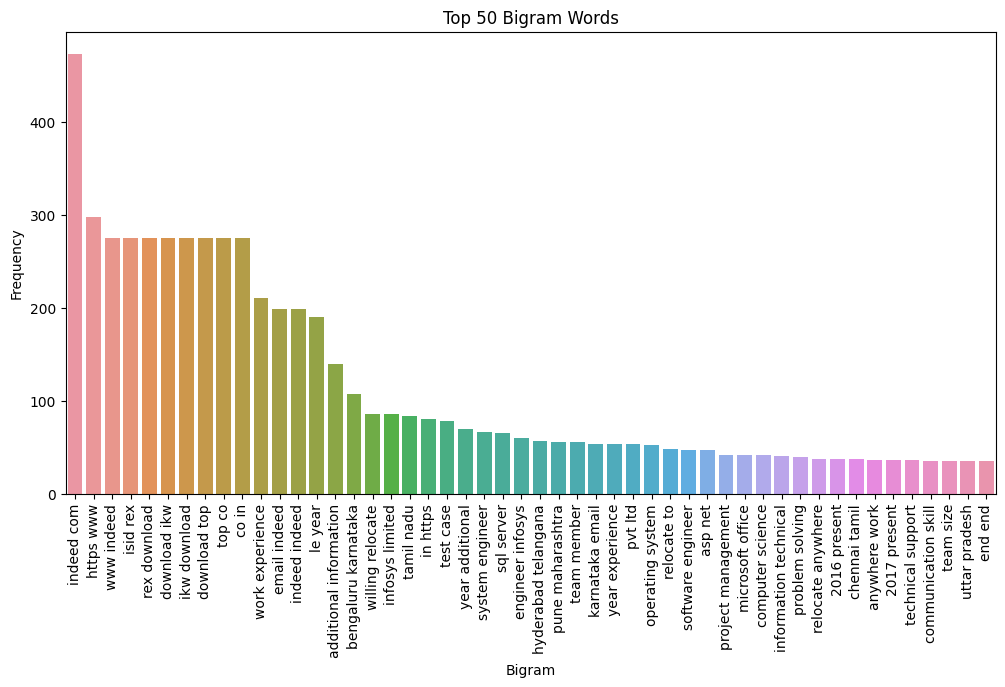

In [45]:
plt.figure(figsize = (12, 6))
g = sns.barplot(data = df2, x = 'Bigram', y = 'Frequency');
g.set_xticklabels(df2['Bigram'], rotation=90)
plt.title('Top 50 Bigram Words')
plt.show()

# Trigram


In [46]:
def get_top_n_words(x, n):
  vec = CountVectorizer(ngram_range=(3, 3)).fit(x)
  bow = vec.transform(x)
  sum_words = bow.sum(axis = 0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
  return words_freq[:n]

In [47]:
words = get_top_n_words(clean_resumes['content'], 50)


In [48]:
words


[('https www indeed', 275),
 ('www indeed com', 275),
 ('isid rex download', 275),
 ('rex download ikw', 275),
 ('download ikw download', 275),
 ('ikw download top', 275),
 ('download top co', 275),
 ('top co in', 275),
 ('email indeed indeed', 198),
 ('indeed indeed com', 198),
 ('co in https', 80),
 ('in https www', 78),
 ('year additional information', 69),
 ('karnataka email indeed', 53),
 ('willing relocate to', 48),
 ('system engineer infosys', 44),
 ('engineer infosys limited', 41),
 ('additional information technical', 40),
 ('willing relocate anywhere', 37),
 ('chennai tamil nadu', 37),
 ('le year additional', 37),
 ('relocate anywhere work', 36),
 ('anywhere work experience', 36),
 ('bengaluru karnataka email', 34),
 ('linkedin com in', 33),
 ('www linkedin com', 31),
 ('senior system engineer', 29),
 ('india pvt ltd', 28),
 ('maharashtra email indeed', 27),
 ('additional information skill', 26),
 ('telangana email indeed', 25),
 ('operating system window', 23),
 ('informatio

In [49]:
df3 = pd.DataFrame(words, columns = ['Trigram', 'Frequency'])
df3

,Trigram,Frequency
0,https www indeed,275
1,www indeed com,275
2,isid rex download,275
3,rex download ikw,275
4,download ikw download,275
5,ikw download top,275
6,download top co,275
7,top co in,275
8,email indeed indeed,198
9,indeed indeed com,198


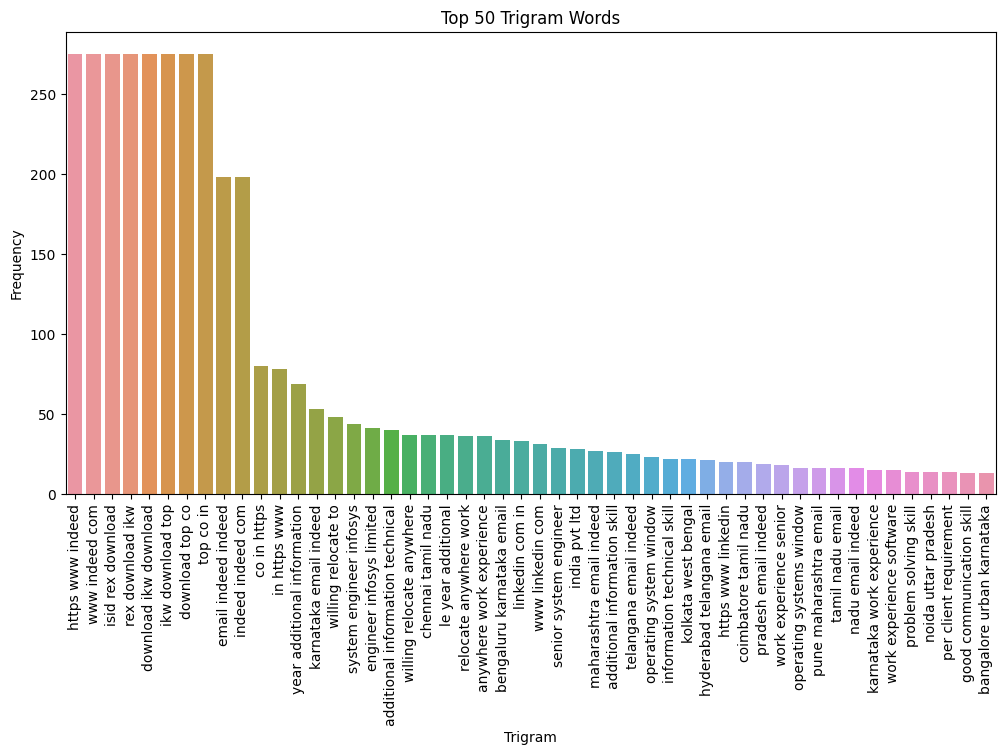

In [50]:
plt.figure(figsize = (12, 6))
g = sns.barplot(data = df3, x = 'Trigram', y = 'Frequency');
g.set_xticklabels(df3['Trigram'], rotation=90)
plt.title('Top 50 Trigram Words')
plt.show()

# Distribution of Top 50 Part-of-Speech POS Tags


In [51]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
from textblob import TextBlob

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [52]:
nltk.help.upenn_tagset()


$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [53]:
blob = TextBlob(str(clean_resumes['content']))
blob.tags

[('0', 'CD'),
 ('govardhana', 'NN'),
 ('k', 'NN'),
 ('senior', 'JJ'),
 ('software', 'NN'),
 ('engineer', 'NN'),
 ('bengalur', 'NN'),
 ('1', 'CD'),
 ('harini', 'NN'),
 ('komaravelli', 'JJ'),
 ('test', 'NN'),
 ('analyst', 'NN'),
 ('oracle', 'NN'),
 ('hyderab', 'NN'),
 ('2', 'CD'),
 ('hartej', 'NN'),
 ('kathuria', 'NNS'),
 ('data', 'NNS'),
 ('analyst', 'NN'),
 ('intern', 'JJ'),
 ('oracle', 'NN'),
 ('ret', 'NN'),
 ('3', 'CD'),
 ('ijas', 'JJ'),
 ('nizamuddin', 'JJ'),
 ('associate', 'NN'),
 ('consultant', 'NN'),
 ('state', 'NN'),
 ('str', 'NN'),
 ('4', 'CD'),
 ('imgeeyaul', 'NN'),
 ('ansari', 'NN'),
 ('java', 'NN'),
 ('developer', 'NN'),
 ('pune', 'NN'),
 ('maharasht', 'NN'),
 ('195', 'CD'),
 ('mansi', 'NN'),
 ('thanki', 'NN'),
 ('student', 'NN'),
 ('jamnagar', 'NN'),
 ('gujarat', 'NN'),
 ('email', 'NN'),
 ('in', 'IN'),
 ('196', 'CD'),
 ('anil', 'JJ'),
 ('kumar', 'NN'),
 ('microsoft', 'JJ'),
 ('azure', 'NN'),
 ('basic', 'JJ'),
 ('management', 'NN'),
 ('de', 'NN'),
 ('197', 'CD'),
 ('siddhart

In [54]:
pos_df = pd.DataFrame(blob.tags, columns = ['words', 'pos'])
pos_df.head()

,words,pos
0,0,CD
1,govardhana,NN
2,k,NN
3,senior,JJ
4,software,NN


In [55]:
pos_df = pos_df['pos'].value_counts()
pos_df

NN     51
JJ     12
CD     11
NNS     2
IN      1
NNP     1
Name: pos, dtype: int64

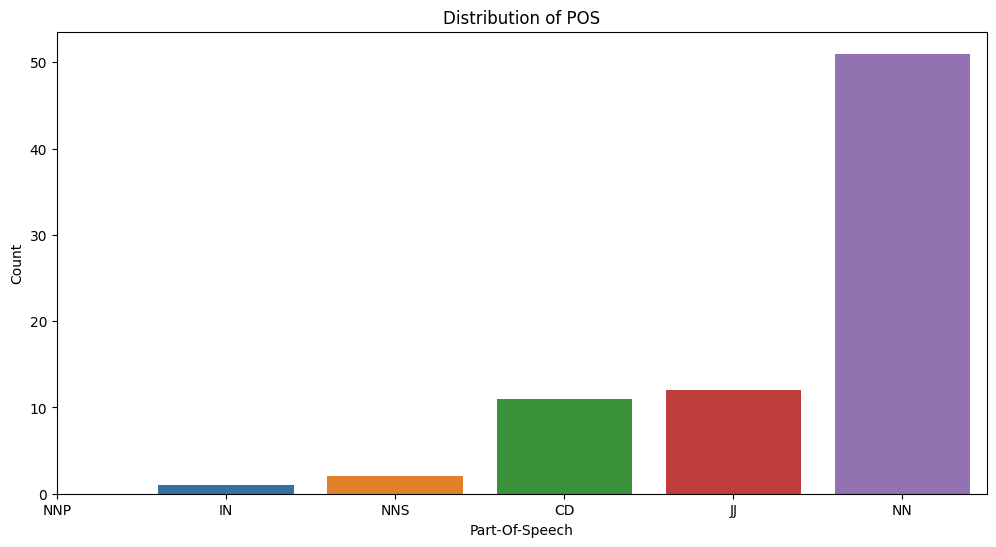

In [56]:
plt.figure(figsize = (12, 6))
sns.barplot(data = pos_df, y = pos_df.index, x = pos_df.values);
labels = list(pos_df.index)
labels.reverse()
plt.xticks(np.arange(6) - 1.0, labels)
plt.title('Distribution of POS')
plt.ylabel('Count')
plt.xlabel('Part-Of-Speech')
plt.show();

# Word Cloud


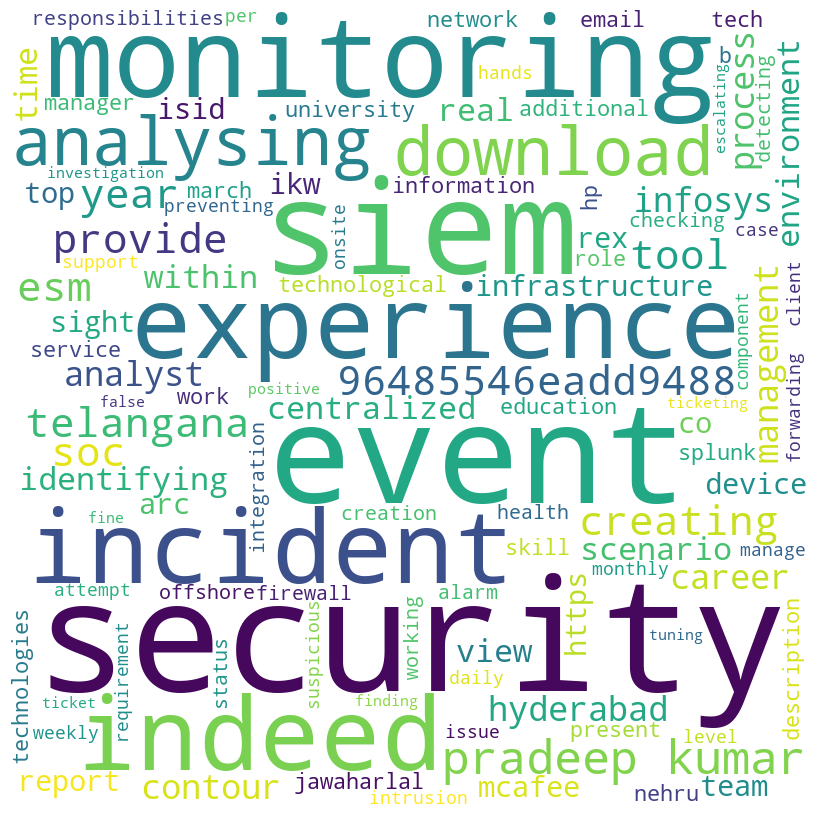

In [57]:
#Final word cloud after all the cleaning and pre-processing
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
content_words = ' '
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in clean_resumes.content: 

   # typecaste each val to string 
   val = str(val) 

   # split the value 
   tokens = val.split() 

# Converts each token into lowercase 
for i in range(len(tokens)): 
    tokens[i] = tokens[i].lower() 

for words in tokens: 
    content_words = content_words + words + ' '


wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(content_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

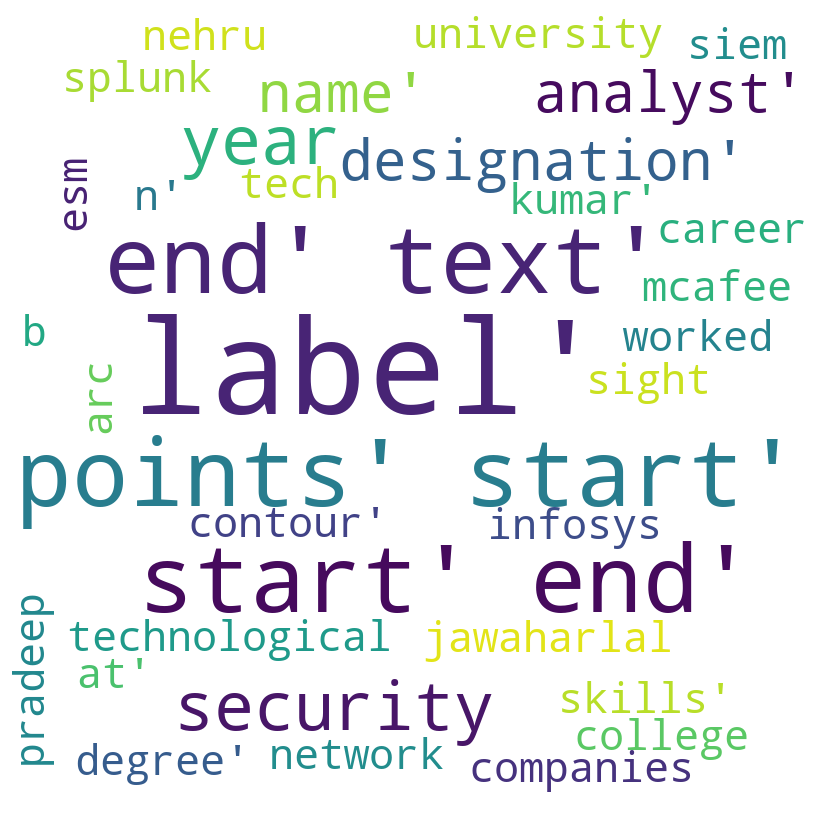

In [58]:
#Final word cloud after all the cleaning and pre-processing
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
content_words = ' '
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in df.annotation: 

   # typecaste each val to string 
   val = str(val) 

   # split the value 
   tokens = val.split() 

# Converts each token into lowercase 
for i in range(len(tokens)): 
    tokens[i] = tokens[i].lower() 

for words in tokens: 
    content_words = content_words + words + ' '


wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(content_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()


# We obtain the frequency distribution of all the words and pick the 75 most frequently occurring words in all of 
# "resume corpus."

In [59]:
# %matplotlib notebook
from nltk import FreqDist
from collections import Iterable
import matplotlib.pyplot as plt

def flatten(lis):
     for item in lis:
        if isinstance(item, Iterable) and not isinstance(item, str):
             for x in flatten(item):
                yield x
        else:        
             yield item

tokenized_resumes = list(clean_resumes['content'])
#tokenized_resumes

for i in range(len(tokenized_resumes)):
    #print(type(tokenized_resumes[i]))
    tokenized_resumes[i] = str(tokenized_resumes[i]).split(" ")   
    
tokenized_resumes = list(flatten(tokenized_resumes))

freq_dist = FreqDist(tokenized_resumes)
freq_dist


C:\Users\sanja\AppData\Local\Temp\ipykernel_21176\1545046889.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


FreqDist({'': 3572, 'year': 644, 'management': 605, 'project': 564, 'team': 530, 'experience': 508, 'application': 471, 'skill': 435, 'system': 434, 'work': 418, ...})

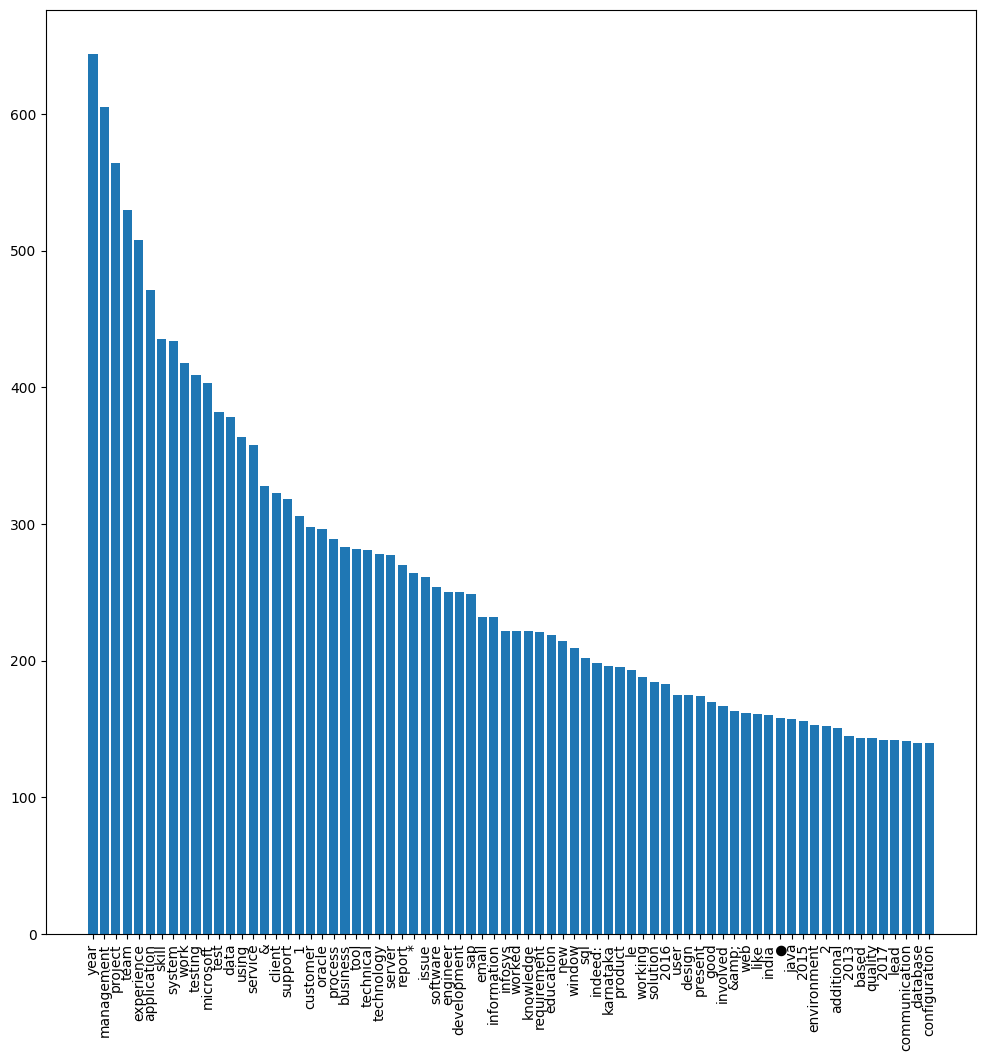

In [60]:
fd_common75 = freq_dist.most_common(75)

words = []
frequency = []

for i in range(1, 75):
    words.append(fd_common75[i][0]) 
    frequency.append(fd_common75[i][1])

plt.figure(figsize = (12, 12))
plt.bar(words, frequency)
plt.xticks(rotation = 90)
plt.show()

Insights from the Bar Graph:
The most mentioned companies on the applicants resumes were Microsoft and Oracle.
Some of the keywords that the applicants emphasized on, in order, were management, data, testing, customer, business, technical and software.
Under the assumption that all the applicants are applying to the same vacancy, we can hypothesize that this job is a leadership role that requires business and customer-communication skills accompanied with technical skills.
The word “experience” was the 5th most frequent word, which demonstrates the high importance of experience over education in the job market.


# Model Training and Prediction

In [61]:
!pip install seqeval==0.0.12

In [62]:
# Required Library
# !pip install seqeval==0.0.12

# Importing required Libraries
import pandas as pd
import math
import numpy as np
import os
import json
import random
import logging
import re
import spacy
import random

# data_file_address = '/content/Resume.json'
# df_data = pd.read_json(data_file_address, lines=True)
# Removing New Line characters
for i in range(len(df)):
  df["content"][i] = df["content"][i].replace("\n", " ")

# JSON formatting functions
def convert_dataturks_to_spacy(dataturks_JSON_FilePath):
    try:
        training_data = []
        lines=[]
        with open(dataturks_JSON_FilePath, encoding="utf-8") as f:
            lines = f.readlines()

        for line in lines:
            data = json.loads(line)
            text = data['content'].replace("\n", " ")
            entities = []
            data_annotations = data['annotation']
            if data_annotations is not None:
                for annotation in data_annotations:
                    #only a single point in text annotation.
                    point = annotation['points'][0]
                    labels = annotation['label']
                    # handle both list of labels or a single label.
                    if not isinstance(labels, list):
                        labels = [labels]

                    for label in labels:
                        point_start = point['start']
                        point_end = point['end']
                        point_text = point['text']
                        
                        lstrip_diff = len(point_text) - len(point_text.lstrip())
                        rstrip_diff = len(point_text) - len(point_text.rstrip())
                        if lstrip_diff != 0:
                            point_start = point_start + lstrip_diff
                        if rstrip_diff != 0:
                            point_end = point_end - rstrip_diff
                        entities.append((point_start, point_end + 1 , label))
            training_data.append((text, {"entities" : entities}))
        return training_data
    except Exception as e:
        logging.exception("Unable to process " + dataturks_JSON_FilePath + "\n" + "error = " + str(e))
        return None

def trim_entity_spans(data: list) -> list:
    """Removes leading and trailing white spaces from entity spans.

    Args:
        data (list): The data to be cleaned in spaCy JSON format.

    Returns:
        list: The cleaned data.
    """
    invalid_span_tokens = re.compile(r'\s')

    cleaned_data = []
    for text, annotations in data:
        entities = annotations['entities']
        valid_entities = []
        for start, end, label in entities:
            valid_start = start
            valid_end = end
            while valid_start < len(text) and invalid_span_tokens.match(
                    text[valid_start]):
                valid_start += 1
            while valid_end > 1 and invalid_span_tokens.match(
                    text[valid_end - 1]):
                valid_end -= 1
            valid_entities.append([valid_start, valid_end, label])
        cleaned_data.append([text, {'entities': valid_entities}])
    return cleaned_data

# Spacy Entity Interaction

In [63]:
data = trim_entity_spans(convert_dataturks_to_spacy(source_file))
data[0]

['Govardhana K Senior Software Engineer  Bengaluru, Karnataka, Karnataka - Email me on Indeed: indeed.com/r/Govardhana-K/ b2de315d95905b68  Total IT experience 5 Years 6 Months Cloud Lending Solutions INC 4 Month • Salesforce Developer Oracle 5 Years 2 Month • Core Java Developer Languages Core Java, Go Lang Oracle PL-SQL programming, Sales Force Developer with APEX.  Designations & Promotions  Willing to relocate: Anywhere  WORK EXPERIENCE  Senior Software Engineer  Cloud Lending Solutions -  Bangalore, Karnataka -  January 2018 to Present  Present  Senior Consultant  Oracle -  Bangalore, Karnataka -  November 2016 to December 2017  Staff Consultant  Oracle -  Bangalore, Karnataka -  January 2014 to October 2016  Associate Consultant  Oracle -  Bangalore, Karnataka -  November 2012 to December 2013  EDUCATION  B.E in Computer Science Engineering  Adithya Institute of Technology -  Tamil Nadu  September 2008 to June 2012  https://www.indeed.com/r/Govardhana-K/b2de315d95905b68?isid=rex-

# Splitting into Train & Test Data

In [68]:
import pandas as pd
import math
import numpy as np
import os
import json
import random
import logging
import re
import spacy
import random

# data_file_address = '/content/Resume.json'
# df_data = pd.read_json(data_file_address, lines=True)
# Removing New Line characters
for i in range(len(df)):
  df["content"][i] = df["content"][i].replace("\n", " ")

# JSON formatting functions
def convert_dataturks_to_spacy(dataturks_JSON_FilePath):
    try:
        training_data = []
        lines=[]
        with open(dataturks_JSON_FilePath, encoding="utf-8") as f:
            lines = f.readlines()

        for line in lines:
            data = json.loads(line)
            text = data['content'].replace("\n", " ")
            entities = []
            data_annotations = data['annotation']
            if data_annotations is not None:
                for annotation in data_annotations:
                    #only a single point in text annotation.
                    point = annotation['points'][0]
                    labels = annotation['label']
                    # handle both list of labels or a single label.
                    if not isinstance(labels, list):
                        labels = [labels]

                    for label in labels:
                        point_start = point['start']
                        point_end = point['end']
                        point_text = point['text']
                        
                        lstrip_diff = len(point_text) - len(point_text.lstrip())
                        rstrip_diff = len(point_text) - len(point_text.rstrip())
                        if lstrip_diff != 0:
                            point_start = point_start + lstrip_diff
                        if rstrip_diff != 0:
                            point_end = point_end - rstrip_diff
                        entities.append((point_start, point_end + 1 , label))
            training_data.append((text, {"entities" : entities}))
        return training_data
    except Exception as e:
        logging.exception("Unable to process " + dataturks_JSON_FilePath + "\n" + "error = " + str(e))
        return None

def trim_entity_spans(data: list) -> list:
    """Removes leading and trailing white spaces from entity spans.

    Args:
        data (list): The data to be cleaned in spaCy JSON format.

    Returns:
        list: The cleaned data.
    """
    invalid_span_tokens = re.compile(r'\s')

    cleaned_data = []
    for text, annotations in data:
        entities = annotations['entities']
        valid_entities = []
        for start, end, label in entities:
            valid_start = start
            valid_end = end
            while valid_start < len(text) and invalid_span_tokens.match(
                    text[valid_start]):
                valid_start += 1
            while valid_end > 1 and invalid_span_tokens.match(
                    text[valid_end - 1]):
                valid_end -= 1
            valid_entities.append([valid_start, valid_end, label])
        cleaned_data.append([text, {'entities': valid_entities}])
    return cleaned_data

In [69]:
data = trim_entity_spans(convert_dataturks_to_spacy(source_file))
data[0]

['Govardhana K Senior Software Engineer  Bengaluru, Karnataka, Karnataka - Email me on Indeed: indeed.com/r/Govardhana-K/ b2de315d95905b68  Total IT experience 5 Years 6 Months Cloud Lending Solutions INC 4 Month • Salesforce Developer Oracle 5 Years 2 Month • Core Java Developer Languages Core Java, Go Lang Oracle PL-SQL programming, Sales Force Developer with APEX.  Designations & Promotions  Willing to relocate: Anywhere  WORK EXPERIENCE  Senior Software Engineer  Cloud Lending Solutions -  Bangalore, Karnataka -  January 2018 to Present  Present  Senior Consultant  Oracle -  Bangalore, Karnataka -  November 2016 to December 2017  Staff Consultant  Oracle -  Bangalore, Karnataka -  January 2014 to October 2016  Associate Consultant  Oracle -  Bangalore, Karnataka -  November 2012 to December 2013  EDUCATION  B.E in Computer Science Engineering  Adithya Institute of Technology -  Tamil Nadu  September 2008 to June 2012  https://www.indeed.com/r/Govardhana-K/b2de315d95905b68?isid=rex-

In [70]:
# Splitting the data into train and test data
train_data = data[:180]
test_data = data[180:]

#Training inatilize
nlp = spacy.blank('en')
iterations = 29
def train_model(train_data):
    if 'ner' not in nlp.pipe_names:
        ner = nlp.create_pipe('ner')
        nlp.add_pipe(ner, last = True)
    
    for _, annotation in train_data:
        for ent in annotation['entities']:
            ner.add_label(ent[2])
            
    
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
    with nlp.disable_pipes(*other_pipes):  # only train NER
        optimizer = nlp.begin_training()
        for itn in range(iterations):
            print("Statring iteration " + str(itn))
            random.shuffle(train_data)
            losses = {}
            index = 0
            for text, annotations in train_data:
                try:
                    nlp.update(
                        [text],  # batch of texts
                        [annotations],  # batch of annotations
                        drop=0.02,  # dropout - make it harder to memorise data
                        sgd=optimizer,  # callable to update weights
                        losses=losses)
                except Exception as e:
                    pass
                
            print(losses)

# Model Training
train_model(train_data)

ValueError: [E966] `nlp.add_pipe` now takes the string name of the registered component factory, not a callable component. Expected string, but got <spacy.pipeline.ner.EntityRecognizer object at 0x00000180DE125CF0> (name: 'None').

- If you created your component with `nlp.create_pipe('name')`: remove nlp.create_pipe and call `nlp.add_pipe('name')` instead.

- If you passed in a component like `TextCategorizer()`: call `nlp.add_pipe` with the string name instead, e.g. `nlp.add_pipe('textcat')`.

- If you're using a custom component: Add the decorator `@Language.component` (for function components) or `@Language.factory` (for class components / factories) to your custom component and assign it a name, e.g. `@Language.component('your_name')`. You can then run `nlp.add_pipe('your_name')` to add it to the pipeline.

Model Building:
Resume Parsing with Custom NER Training Model with SpaCy:

In [72]:
import spacy
import pickle
import random
import pandas as pd

In [73]:
model_file="ner_model"
iterations=20

In [74]:
df = pd.read_json('Resume.json', lines=True)
df.head()

,content,annotation
0,Govardhana K\nSenior Software Engineer\n\nBeng...,"[{'label': ['Companies worked at'], 'points': ..."
1,"Harini Komaravelli\nTest Analyst at Oracle, Hy...","[{'label': ['Companies worked at'], 'points': ..."
2,Hartej Kathuria\nData Analyst Intern - Oracle ...,"[{'label': ['Skills'], 'points': [{'start': 22..."
3,Ijas Nizamuddin\nAssociate Consultant - State ...,"[{'label': ['Skills'], 'points': [{'start': 46..."
4,"Imgeeyaul Ansari\njava developer\n\nPune, Maha...","[{'label': ['Skills'], 'points': [{'start': 18..."


In [75]:
# Personal Custom Tags Dictionary
entity_dict = {
    'Name': 'NAME', 
    'College Name': 'CLG',
    'Degree': 'DEG',
    'Graduation Year': 'GRADYEAR',
    'Years of Experience': 'YOE',
    'Companies worked at': 'COMPANY',
    'Designation': 'DESIG',
    'Skills': 'SKILLS',
    'Location': 'LOC',
    'Email Address': 'EMAIL'
    }

In [76]:
#For merging intervals the algorithm used:
#1. Sort the intervals in increasing order.
#2. Push the first interval on the stack.
#3. Iterate through intervals and for each one compare current interval with the top of the stack and:
    #A. If current interval does not overlap, push on to stack.
    #B. If current interval does overlap, merge both intervals in to one and push on to stack.
#4. At the end return stack.



def mergeIntervals(intervals):
    sorted_by_lower_bound = sorted(intervals, key=lambda tup: tup[0])
    merged = []
# lower and higher represent the bounds of the current run of merges
    for higher in sorted_by_lower_bound:
        if not merged:
            merged.append(higher)
        else:
            lower = merged[-1]
            # test for intersection between lower and higher:
            if higher[0] <= lower[1]: # new interval overlaps current run
                if lower[2] is higher[2]:
                    upper_bound = max(lower[1], higher[1]) # merge with the current run
                    merged[-1] = (lower[0], upper_bound, lower[2]) # replace by merged interval
                else:
                    if lower[1] > higher[1]:
                        merged[-1] = lower
                    else:
                        merged[-1] = (lower[0], higher[1], higher[2])
            else:
                merged.append(higher)

    return merged

In [77]:
#From 'annotation' column, we are extracting the starting index, ending index and entity label

def get_entities(df):
    
    entities = []
    
    for i in range(len(df)):
        entity = []
    
        for annot in df['annotation'][i]:
            try:
                ent = entity_dict[annot['label'][0]]
                start = annot['points'][0]['start']
                end = annot['points'][0]['end'] + 1
                entity.append((start, end, ent))
            except:
                pass
    
        entity = mergeIntervals(entity)
        entities.append(entity)
    
    return entities

In [78]:
# Adding a new column 'entities'
df['entities'] = get_entities(df)
df.head()

,content,annotation,entities
0,Govardhana K\nSenior Software Engineer\n\nBeng...,"[{'label': ['Companies worked at'], 'points': ...","[(0, 12, NAME), (13, 38, DESIG), (39, 48, LOC)..."
1,"Harini Komaravelli\nTest Analyst at Oracle, Hy...","[{'label': ['Companies worked at'], 'points': ...","[(0, 18, NAME), (19, 31, DESIG), (35, 41, COMP..."
2,Hartej Kathuria\nData Analyst Intern - Oracle ...,"[{'label': ['Skills'], 'points': [{'start': 22...","[(0, 15, NAME), (16, 35, DESIG), (38, 52, COMP..."
3,Ijas Nizamuddin\nAssociate Consultant - State ...,"[{'label': ['Skills'], 'points': [{'start': 46...","[(0, 15, NAME), (16, 36, DESIG), (39, 52, COMP..."
4,"Imgeeyaul Ansari\njava developer\n\nPune, Maha...","[{'label': ['Skills'], 'points': [{'start': 18...","[(0, 16, NAME), (17, 31, DESIG), (33, 37, LOC)..."


In [79]:
a=[]


In [80]:
for i in range(len(df)):
    a.append((df['content'][i],{'entities':df['entities'][i]}))

In [81]:
import re


def trim_entity_spans(data: list) -> list:
    """Removes leading and trailing white spaces from entity spans.

    Args:
        data (list): The data to be cleaned in spaCy JSON format.

    Returns:
        list: The cleaned data.
    """
    invalid_span_tokens = re.compile(r'\s')

    cleaned_data = []
    for text, annotations in data:
        entities = annotations['entities']
        valid_entities = []
        for start, end, label in entities:
            valid_start = start
            valid_end = end
            while valid_start < len(text) and invalid_span_tokens.match(
                    text[valid_start]):
                valid_start += 1
            while valid_end > 1 and invalid_span_tokens.match(
                    text[valid_end - 1]):
                valid_end -= 1
            valid_entities.append([valid_start, valid_end, label])
        cleaned_data.append([text, {'entities': valid_entities}])

    return cleaned_data

In [82]:
a = trim_entity_spans(a)


In [83]:
nlp = spacy.blank('en')  
print("Created blank NLP model")


Created blank NLP model


In [84]:
# Create NLP Pipeline
if 'ner' not in nlp.pipe_names:
    ner_pipe = nlp.add_pipe('ner')
else:
    ner_pipe = nlp.get_pipe('ner')

In [85]:
# Add entities labels to the ner pipeline
for text, annotations in a:
    for entity in annotations.get('entities'):
        ner_pipe.add_label(entity[2].upper())

In [86]:
from spacy.training.example import Example
# get names of other pipes to disable them during training
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
# train NER Model
with nlp.disable_pipes(*other_pipes):  # only train NER
    optimizer = nlp.initialize()
    for itn in range(iterations):
        print("Iteration Number:" + str(itn))
        random.shuffle(a)
        losses = {}
        for text, annotations in a:
            doc = nlp.make_doc(text)
            example = Example.from_dict(doc, annotations)
            nlp.update([example], sgd=optimizer,losses=losses, drop=0.3)
            print("losses", losses)


Iteration Number:0


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Saurabh Sandhikar
SAURABH SANDHIKAR

Hyderabad, Te..." with entities "[[0, 17, 'NAME'], [37, 46, 'LOC'], [80, 128, 'EMAI...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 437.5670839548111}
losses {'ner': 2836.074404358864}
losses {'ner': 4314.755060791969}
losses {'ner': 4450.813913375139}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Nida Khan
Tech Support Executive - Teleperformance..." with entities "[[0, 32, 'DESIG'], [35, 64, 'COMPANY'], [66, 72, '...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 4559.626941233873}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Madhuri Sripathi
Banglore, Karnataka, Karnataka - ..." with entities "[[0, 16, 'NAME'], [17, 25, 'LOC'], [62, 117, 'EMAI...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 5445.56365826726}
losses {'ner': 5707.285379558802}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Suresh Kanagala
Architecture SharePoint/Office 365..." with entities "[[0, 15, 'NAME'], [70, 79, 'LOC'], [113, 159, 'EMA...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 5911.542948085815}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Zaheer Uddin
Technical Project Manager

Hyderabad,..." with entities "[[0, 12, 'NAME'], [13, 38, 'DESIG'], [40, 49, 'LOC...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 6595.8146835155785}
losses {'ner': 6700.0565589256585}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "VARUN AHLUWALIA
Quantitative Analyst

- Email me o..." with entities "[[0, 15, 'NAME'], [16, 36, 'DESIG'], [61, 105, 'EM...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Sanand Pal
SQL and MSBI Developer with experience ..." with entities "[[0, 10, 'NAME'], [11, 33, 'DESIG'], [85, 95, 'LOC...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 6969.635995943099}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Yogesh Ghatole
Engineer / Electrical Supervisor, S..." with entities "[[0, 14, 'NAME'], [15, 100, 'COMPANY'], [419, 452,...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 7106.544626642019}
losses {'ner': 7210.686413574964}
losses {'ner': 7539.197565365583}
losses {'ner': 7628.86188863001}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Nitin Verma
Assisting Microsoft Partners - Exchang..." with entities "[[0, 11, 'NAME'], [12, 69, 'DESIG'], [71, 75, 'LOC...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 7642.745344893359}
losses {'ner': 7699.186106479117}
losses {'ner': 7725.830976638741}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Girish Acharya
Technical Architect & Sr. Software ..." with entities "[[0, 14, 'NAME'], [15, 58, 'DESIG'], [60, 64, 'LOC...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 7794.573546282396}
losses {'ner': 8000.429357878313}
losses {'ner': 8026.258177894869}
losses {'ner': 8059.992779079535}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Imgeeyaul Ansari
java developer

Pune, Maharashtra..." with entities "[[0, 16, 'NAME'], [17, 31, 'DESIG'], [33, 37, 'LOC...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Fenil Francis
head of operation and logistics

Tri..." with entities "[[0, 13, 'NAME'], [14, 45, 'DESIG'], [47, 55, 'LOC...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 8083.541468397857}
losses {'ner': 8280.020076827288}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Hartej Kathuria
Data Analyst Intern - Oracle Retai..." with entities "[[0, 15, 'NAME'], [16, 35, 'DESIG'], [38, 51, 'COM...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 8324.553740591884}
losses {'ner': 8446.118960888267}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "PRASHANTH BADALA
Devops Engineer ,Cloud Engineer -..." with entities "[[0, 16, 'NAME'], [17, 32, 'DESIG'], [34, 48, 'DES...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 8609.081662864566}
losses {'ner': 8625.355482999843}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Krishna Prasad
Patna, Bihar - Email me on Indeed: ..." with entities "[[0, 14, 'NAME'], [15, 20, 'LOC'], [50, 94, 'EMAIL...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Raktim Podder
6+ Exp in banking operations and cre..." with entities "[[0, 13, 'NAME'], [14, 16, 'YOE'], [66, 70, 'LOC']...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 8656.530360974979}
losses {'ner': 8778.351130404186}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Sai Dhir
- Email me on Indeed: indeed.com/r/Sai-Dh..." with entities "[[0, 8, 'NAME'], [31, 69, 'EMAIL'], [88, 124, 'LOC...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 8801.321831605073}
losses {'ner': 8822.44933637886}
losses {'ner': 8863.531692472312}
losses {'ner': 8893.812547261852}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Ajay Elango
Software Engineer

Bangalore City, Kar..." with entities "[[717, 748, 'CLG'], [6642, 6696, 'DEG'], [6698, 67...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 8898.570656010907}
losses {'ner': 8913.81552280456}
losses {'ner': 8931.186444620125}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Nitin Tr
PeopleSoft Consultant

Bangalore Urban, K..." with entities "[[0, 8, 'NAME'], [32, 47, 'LOC'], [81, 119, 'EMAIL...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 8964.513854941928}
losses {'ner': 8978.112607191364}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Mayank Shukla
Infosys group as a Test Analyst - In..." with entities "[[0, 13, 'NAME'], [33, 45, 'DESIG'], [48, 81, 'COM...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 9018.62601096374}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Soumya Balan
IT SUPPORT

Sulthan Bathery, Kerala, ..." with entities "[[0, 12, 'NAME'], [13, 23, 'DESIG'], [25, 40, 'LOC...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 9026.68011173655}
losses {'ner': 9044.222381599651}
losses {'ner': 9059.446773615953}
losses {'ner': 9179.21181436568}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Jatin Arora
SDET Automation Engineer, Infosys - CR..." with entities "[[0, 11, 'NAME'], [12, 36, 'DESIG'], [38, 45, 'COM...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 9372.99979712754}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Jyotirbindu Patnaik
Associate consultant@SAP labs ..." with entities "[[0, 40, 'DESIG'], [73, 82, 'LOC'], [116, 166, 'EM...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 9389.506139597519}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Praveen Bhaskar
Program Manager (Software Delivery..." with entities "[[0, 15, 'NAME'], [16, 51, 'DESIG'], [54, 67, 'COM...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 9404.460039353244}
losses {'ner': 9451.121938683804}
losses {'ner': 9583.708783849039}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Shreyanshu Gupta
Software Development Engineer wit..." with entities "[[0, 16, 'NAME'], [17, 46, 'DESIG'], [52, 60, 'YOE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Ravi Shankar
Working as Escalation Engineer with M..." with entities "[[0, 12, 'NAME'], [13, 43, 'DESIG'], [49, 58, 'COM...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 9654.29106183008}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Vishwanath P
Senior Executive (MIS & Audit) - Job ..." with entities "[[0, 12, 'NAME'], [13, 43, 'DESIG'], [61, 93, 'COM...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 9668.000769874385}
losses {'ner': 9680.966869301641}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Keshav Dhawale
3 TCS Security guard Access Control..." with entities "[[0, 14, 'NAME'], [17, 35, 'DESIG'], [56, 62, 'YOE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 9715.227329950792}
losses {'ner': 9728.507406201335}
losses {'ner': 9744.968446283543}
losses {'ner': 9762.695945084324}
losses {'ner': 9788.57349685371}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Rajeev Kumar
Senior Associate Consultant - Infosys..." with entities "[[0, 12, 'NAME'], [13, 40, 'DESIG'], [43, 64, 'COM...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 9826.596236711146}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Siddhartha Chetri
7 years of experience in IT Netw..." with entities "[[0, 17, 'NAME'], [18, 25, 'YOE'], [270, 279, 'LOC...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 9836.839379738678}
losses {'ner': 9850.446444946692}
losses {'ner': 9868.348416717317}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Kavitha K
Senior System Engineer - Infosys Limited..." with entities "[[0, 9, 'NAME'], [10, 32, 'DESIG'], [35, 50, 'COMP...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 9922.941182604492}
losses {'ner': 9945.750586760216}
losses {'ner': 9995.97747037289}
losses {'ner': 10068.168669136772}
losses {'ner': 10106.93060103511}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Ravi Shivgond
Bidar, Karnataka - Email me on Indee..." with entities "[[0, 13, 'NAME'], [14, 19, 'LOC'], [53, 96, 'EMAIL...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 10123.892394907954}
losses {'ner': 10168.634667993145}
losses {'ner': 10178.23954886866}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Shraddha Achar
Mathura, Uttar Pradesh - Email me o..." with entities "[[0, 14, 'NAME'], [15, 22, 'LOC'], [60, 105, 'EMAI...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Palani S
Senior Technology Support Executive at In..." with entities "[[0, 8, 'NAME'], [9, 44, 'DESIG'], [48, 55, 'COMPA...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 10191.426149937583}
losses {'ner': 10212.849792319666}
losses {'ner': 10248.924129635878}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Sudaya Puranik
Principal Engineer Technical Staff ..." with entities "[[0, 14, 'NAME'], [15, 49, 'DESIG'], [52, 61, 'COM...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 10273.182809292073}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Koushik Katta
Devops

Hyderabad, Telangana - Email..." with entities "[[0, 13, 'NAME'], [22, 31, 'LOC'], [65, 108, 'EMAI...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 10315.391393984984}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Angad Waghmare
Pune, Maharashtra - Email me on Ind..." with entities "[[0, 14, 'NAME'], [15, 19, 'LOC'], [55, 99, 'EMAIL...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 10327.133376744048}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Nidhi Pandit
Test Engineer - Infosys Limited

- Em..." with entities "[[0, 12, 'NAME'], [13, 26, 'DESIG'], [29, 44, 'COM...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Pratibha P
Principal Consultant at Oracle

Bengalu..." with entities "[[0, 10, 'NAME'], [11, 31, 'DESIG'], [35, 41, 'COM...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 10433.90441622998}
losses {'ner': 10495.27605273487}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Senthil Kumar
Senior Technical Lead - HCL Cisco

-..." with entities "[[0, 13, 'NAME'], [14, 35, 'DESIG'], [38, 47, 'COM...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 10552.080422931536}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Debasish Dasgupta
Trainer-Finacle-Core Banking Sol..." with entities "[[0, 17, 'NAME'], [18, 56, 'DESIG'], [57, 64, 'COM...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 10566.330292354814}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Urshila Lohani
Senior Corporate Account Executive ..." with entities "[[0, 14, 'NAME'], [15, 49, 'DESIG'], [52, 59, 'COM...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 10600.99748537003}
losses {'ner': 10623.41855800217}
losses {'ner': 10637.232529547104}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Rupesh Reddy
Technology Consultant - EIT Services ..." with entities "[[0, 12, 'NAME'], [13, 34, 'DESIG'], [37, 71, 'COM...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 10653.372743837108}
losses {'ner': 10668.024716483855}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Divesh Singh
Bengaluru, Karnataka - Email me on In..." with entities "[[0, 12, 'NAME'], [13, 22, 'LOC'], [56, 98, 'EMAIL...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 10703.506835840944}
losses {'ner': 10730.294194977536}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Pavithra M
"Infosys" internship

Bengaluru, Karnat..." with entities "[[0, 10, 'NAME'], [12, 19, 'COMPANY'], [21, 31, 'D...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Aarti Pimplay
Operations Center Shift Manager (OCS..." with entities "[[0, 13, 'NAME'], [14, 52, 'DESIG'], [76, 119, 'EM...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 10753.242482498312}
losses {'ner': 10758.47545625901}
losses {'ner': 10783.198674287123}
losses {'ner': 10802.123454192362}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Sharan Adla
- Email me on Indeed: indeed.com/r/Sha..." with entities "[[0, 11, 'NAME'], [34, 75, 'EMAIL'], [86, 91, 'YOE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 10839.497487828794}
losses {'ner': 10856.735950173206}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Pawan Nag
Microsoft Certified System Engineer

Del..." with entities "[[0, 9, 'NAME'], [10, 19, 'DESIG'], [20, 45, 'DESI...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Puran Mal
Jaipur, Rajasthan - Email me on Indeed: ..." with entities "[[0, 9, 'NAME'], [10, 16, 'LOC'], [50, 89, 'EMAIL'...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 10866.411916948306}
losses {'ner': 10876.772632416574}
losses {'ner': 10889.164628415208}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Sameer Kujur
Orrisha - Email me on Indeed: indeed...." with entities "[[0, 12, 'NAME'], [13, 20, 'LOC'], [43, 85, 'EMAIL...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 10900.510982278853}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Akansha Jain
Pune, Maharashtra - Email me on Indee..." with entities "[[0, 12, 'NAME'], [13, 18, 'LOC'], [53, 95, 'EMAIL...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 10910.874355258802}
losses {'ner': 10949.882553330255}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Kavya U.
Network Ops Associate - Accenture

Bengal..." with entities "[[0, 8, 'NAME'], [44, 53, 'LOC'], [87, 124, 'EMAIL...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 10966.64405734977}
losses {'ner': 11262.321264269298}
losses {'ner': 11288.22118900865}
losses {'ner': 11303.320141335726}
losses {'ner': 11376.622481054606}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Sridevi H
Bangalore, Karnataka - Email me on Indee..." with entities "[[0, 9, 'NAME'], [10, 19, 'LOC'], [53, 92, 'EMAIL'...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 11417.259764043245}
losses {'ner': 11465.584802290987}
losses {'ner': 11482.782582148986}
losses {'ner': 11507.153635145518}
losses {'ner': 11516.679577991466}
losses {'ner': 11544.72052380058}
losses {'ner': 11567.792692426447}
losses {'ner': 11576.107771632045}
losses {'ner': 11778.358617541164}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Pradeeba V
LEAD ENGINEER - CISCO

- Email me on In..." with entities "[[0, 10, 'NAME'], [11, 24, 'DESIG'], [27, 32, 'COM...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Vineeth Vijayan
"Store Executive" - Orange City Ho..." with entities "[[0, 15, 'NAME'], [17, 32, 'DESIG'], [36, 77, 'CLG...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 11792.087223292148}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Suman Biswas
SAP UI5 Lead, Native HANA Developer -..." with entities "[[0, 12, 'NAME'], [13, 48, 'DESIG'], [51, 68, 'COM...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 11836.84328333053}
losses {'ner': 11873.512167292674}
losses {'ner': 11883.601115808277}
losses {'ner': 11889.68453981169}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Avani Priya
- Email me on Indeed: indeed.com/r/Ava..." with entities "[[0, 11, 'NAME'], [34, 75, 'EMAIL'], [94, 103, 'DE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 11928.549361647125}
losses {'ner': 11964.7550335983}
losses {'ner': 11989.76256021664}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "amarjyot sodhi
Voice and Accent Trainer :Masters i..." with entities "[[0, 14, 'NAME'], [15, 39, 'DESIG'], [41, 80, 'DEG...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 12049.030115164145}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Asha Subbaiah
(Microsoft Partner Readiness Operati..." with entities "[[0, 13, 'NAME'], [15, 76, 'DESIG'], [79, 92, 'COM...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 12067.956835422281}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Anurag Asthana
Pune, Maharashtra - Email me on Ind..." with entities "[[0, 14, 'NAME'], [15, 19, 'LOC'], [55, 99, 'EMAIL...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 12130.404643685646}
losses {'ner': 12138.937294789743}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Kandrapu Reddy
Senior Travel Operations (Domestic,..." with entities "[[0, 14, 'NAME'], [15, 39, 'DESIG'], [78, 112, 'CO...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 12158.046904574923}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Puneet Bhandari
SAP SD lead - Microsoft IT

Pune, ..." with entities "[[0, 15, 'NAME'], [16, 27, 'DESIG'], [30, 39, 'COM...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 12189.84446048296}
losses {'ner': 12222.845912574718}
losses {'ner': 12235.798125213274}
losses {'ner': 12293.027823871264}
losses {'ner': 12332.22185570454}
losses {'ner': 12346.718763334135}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Arpit Jain
Quality Analyst - ThoughtWorks Technolo..." with entities "[[0, 10, 'NAME'], [11, 26, 'DESIG'], [29, 54, 'COM...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Tejasri Gunnam
Bengaluru, Karnataka - Email me on ..." with entities "[[0, 14, 'NAME'], [15, 24, 'LOC'], [58, 102, 'EMAI...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 12367.481849232317}
losses {'ner': 12421.494785243274}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Srushti Bhadale
Mumbai, Maharashtra - Email me on ..." with entities "[[0, 15, 'NAME'], [16, 22, 'LOC'], [58, 103, 'EMAI...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Akshay Dubey
Actively looking for opportunity in ...." with entities "[[0, 12, 'NAME'], [67, 71, 'LOC'], [107, 149, 'EMA...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 12431.299103182968}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Ashish Indoriya
Sr. Systems Engineer at Infosys Li..." with entities "[[0, 15, 'NAME'], [16, 36, 'DESIG'], [40, 55, 'COM...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 12440.224857797584}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Shaik Tazuddin
Senior Process Executive - STAR Ind..." with entities "[[0, 14, 'NAME'], [15, 39, 'DESIG'], [42, 52, 'COM...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 12455.563874626167}
losses {'ner': 12467.887352494054}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "B. Gokul
Gokul, Uttar Pradesh - Email me on Indeed..." with entities "[[0, 8, 'LOC'], [9, 14, 'LOC'], [52, 89, 'EMAIL'],...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 12478.043265514383}
losses {'ner': 12508.93805792679}
losses {'ner': 12523.19264023174}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Madhava Konjeti
HR Executive

Bengaluru, Karnataka..." with entities "[[0, 15, 'NAME'], [16, 28, 'DESIG'], [30, 39, 'LOC...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Karthik Gururaj
Technical Lead at Infosys Ltd. - P..." with entities "[[0, 15, 'NAME'], [16, 30, 'DESIG'], [34, 45, 'COM...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 12558.700688695459}
losses {'ner': 12573.788885656282}
losses {'ner': 12614.331167502489}
losses {'ner': 12632.901079437708}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Mohini Gupta
Server Support Engineer

Gurgaon, Har..." with entities "[[0, 12, 'NAME'], [13, 36, 'DESIG'], [38, 45, 'LOC...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 12655.269609292598}
losses {'ner': 12667.42423198017}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Jacob Philip
Kottayam, Kerala - Email me on Indeed..." with entities "[[0, 12, 'NAME'], [13, 21, 'LOC'], [52, 94, 'EMAIL...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 12709.00062768546}
losses {'ner': 12719.35821112228}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Ganesh AlalaSundaram
A Dev-Test Professional with ..." with entities "[[0, 20, 'NAME'], [50, 56, 'YOE'], [129, 136, 'LOC...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 12765.223772187152}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Mahesh Vijay
Bengaluru, Karnataka - Email me on In..." with entities "[[0, 12, 'NAME'], [13, 22, 'LOC'], [56, 98, 'EMAIL...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 12808.695468119182}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Abdul B
Arabic Language supporter (Content Analyst..." with entities "[[0, 7, 'NAME'], [8, 51, 'DESIG'], [53, 62, 'LOC']...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 12829.941678574203}
losses {'ner': 12854.957880325954}
losses {'ner': 12918.112681232731}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Jaspreet Kaur
Oceanic Consultants as a HR Executiv..." with entities "[[0, 13, 'NAME'], [14, 33, 'COMPANY'], [39, 51, 'C...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 12931.997192763858}
losses {'ner': 12981.498326273224}
losses {'ner': 12991.194487443418}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Chaban kumar Debbarma
Tripura - Email me on Indeed..." with entities "[[0, 21, 'NAME'], [22, 29, 'LOC'], [52, 103, 'EMAI...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Priyesh Dubey
Azure Developer with 9 Yrs 8 months ..." with entities "[[0, 13, 'NAME'], [14, 29, 'DESIG'], [35, 48, 'YOE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 13037.537898766948}
losses {'ner': 13088.24714757505}
losses {'ner': 13117.596077787846}
losses {'ner': 13150.743333996106}
losses {'ner': 13180.786829106888}
losses {'ner': 13221.499321666925}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Srinivas VO
Sr. Test Manager

Mumbai, Maharashtra ..." with entities "[[0, 11, 'NAME'], [12, 28, 'DESIG'], [30, 36, 'LOC...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 13254.753602906741}
losses {'ner': 13272.707551828766}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Karthik G V
Program Manager, Product Manager, Prod..." with entities "[[0, 11, 'NAME'], [12, 28, 'DESIG'], [136, 149, 'L...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Ramya. P
Hyderabad, Telangana - Email me on Indeed..." with entities "[[0, 8, 'NAME'], [9, 18, 'LOC'], [52, 89, 'EMAIL']...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 13325.302808171842}
losses {'ner': 13348.511886124612}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Pankaj Bhosale
Microsoft SQL-SERVER

Dhule, Mahara..." with entities "[[0, 14, 'NAME'], [15, 35, 'DESIG'], [37, 42, 'LOC...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 13370.526433611416}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Rahul Tayade
Global Production Support Lead, - Inf..." with entities "[[0, 12, 'NAME'], [13, 43, 'DESIG'], [47, 58, 'COM...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 13387.577626146387}
losses {'ner': 13399.161157196777}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Vinay Singhal
New Delhi, Delhi - Email me on Indee..." with entities "[[0, 13, 'NAME'], [14, 23, 'LOC'], [53, 96, 'EMAIL...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 13420.57236841947}
losses {'ner': 13553.291024994429}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Yathishwaran P
Maximo Consultant - Infosys Limited..." with entities "[[0, 14, 'NAME'], [15, 32, 'DESIG'], [35, 50, 'COM...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 13584.418681705418}
losses {'ner': 13626.13109147711}
losses {'ner': 13630.58572933065}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Sohan Dhakad
Shivpuri, Madhya Pradesh - Email me o..." with entities "[[0, 12, 'NAME'], [13, 21, 'LOC'], [60, 103, 'EMAI...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 13640.269967711743}
losses {'ner': 13651.784457249885}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Puneeth R
Escalation Specialist - HiPower Support ..." with entities "[[0, 9, 'NAME'], [10, 31, 'DESIG'], [34, 56, 'COMP...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 13676.150232299226}
losses {'ner': 13687.116295415843}
losses {'ner': 13711.201140490553}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Laya A
Cluster HR Manager - Velammal New

Chennai,..." with entities "[[0, 6, 'NAME'], [7, 25, 'DESIG'], [28, 40, 'COMPA...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 13723.805003943595}
losses {'ner': 13742.509153757868}
losses {'ner': 13896.781447805974}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Ramesh HP
CES ASSOCIATE CONSULTANT

Bangalore, Kar..." with entities "[[0, 9, 'NAME'], [10, 34, 'DESIG'], [36, 45, 'LOC'...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 13910.498441013502}
losses {'ner': 13917.793869819367}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Chhaya Prabhale
Kharadi, Pune, 411014, IN - Email ..." with entities "[[0, 15, 'NAME'], [16, 23, 'LOC'], [64, 110, 'EMAI...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 13942.913426611256}
losses {'ner': 13972.711912482875}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Arpit Godha
Senior Process Executive

Jaipur, Raja..." with entities "[[0, 11, 'NAME'], [12, 36, 'DESIG'], [38, 44, 'LOC...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 13981.068389079503}
losses {'ner': 14015.882898793285}
losses {'ner': 14035.02003654453}
losses {'ner': 14063.55451974747}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Gunjan Nayyar
Hoshiarpur, Punjab - Email me on Ind..." with entities "[[0, 13, 'NAME'], [14, 24, 'LOC'], [55, 98, 'EMAIL...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 14084.081900680845}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Mohammed Murtuza
Major Incident Manager / Escalati..." with entities "[[0, 16, 'NAME'], [17, 60, 'DESIG'], [63, 78, 'COM...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 14098.332757171149}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Ram Edupuganti
Software Development Director - Ora..." with entities "[[0, 14, 'NAME'], [15, 44, 'DESIG'], [47, 57, 'COM...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 14137.414050290747}
losses {'ner': 14147.083028977278}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Dilliraja Baskaran
Tamil Nadu - Email me on Indeed..." with entities "[[0, 17, 'NAME'], [19, 29, 'LOC'], [52, 100, 'EMAI...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 14175.217485985831}
losses {'ner': 14209.178533312854}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Puneet Singh
Associate Software Engineer

Bengalur..." with entities "[[0, 12, 'NAME'], [13, 40, 'DESIG'], [42, 51, 'LOC...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Roshan Sinha
Application Developer - SAP ABAP

Kol..." with entities "[[0, 12, 'NAME'], [13, 34, 'DESIG'], [37, 45, 'COM...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 14268.00874955589}
losses {'ner': 14310.954890037547}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Navas Koya
Test Engineer

Mangalore, Karnataka - E..." with entities "[[0, 10, 'NAME'], [11, 24, 'DESIG'], [26, 35, 'LOC...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 14526.322136188517}


C:\Users\sanja\anaconda3\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Paul Rajiv
Secunderabad, Andhra Pradesh - Email me..." with entities "[[0, 10, 'NAME'], [11, 23, 'LOC'], [62, 103, 'EMAI...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


losses {'ner': 14547.502579439448}
Iteration Number:1
losses {'ner': 35.12085838920029}
losses {'ner': 39.26797600367365}
losses {'ner': 80.58504300096331}
losses {'ner': 95.14480595792259}
losses {'ner': 134.61392883478482}
losses {'ner': 186.34029049004246}
losses {'ner': 215.01087643791152}
losses {'ner': 268.3598085221315}
losses {'ner': 284.6793558374377}
losses {'ner': 300.71494994060436}
losses {'ner': 475.333803662372}
losses {'ner': 511.9443866153001}
losses {'ner': 521.6200475273317}
losses {'ner': 537.0467561197468}
losses {'ner': 802.2495938253589}
losses {'ner': 810.5931691594599}
losses {'ner': 822.683885933272}
losses {'ner': 837.5564411796922}
losses {'ner': 913.748288893295}
losses {'ner': 965.836341422671}
losses {'ner': 1321.5016149400412}
losses {'ner': 1367.4197337078695}
losses {'ner': 1501.9230098521728}
losses {'ner': 1625.7044350152437}
losses {'ner': 1667.6413101756264}
losses {'ner': 1672.0208841304282}
losses {'ner': 1723.105370915773}
losses {'ner': 1760.40

In [87]:
nlp.to_disk('nlp_ner_model')


In [88]:
nlp_model = spacy.load('nlp_ner_model')


In [89]:
a[1][0]


"Jacob Philip\nKottayam, Kerala - Email me on Indeed: indeed.com/r/Jacob-Philip/db00d831146c9228\n\nStrategicSales,\nexperienceinSales,\nskills.Currently,\nsuccess.\n\nWORK EXPERIENCE\n\nSales and marketing specialist\n\nASSISTANTBUSINESSDEVELOPMENTMANAGER -  Dubai, AE -\n\nFebruary 2017 to October 2017\n\nUAE\n• -Builtstrong\nclientrelationshipsandprovidedhighvalue-addingservices, resultingina15% company\nmarketshareincrease\n• Developstools,\npracticesacrosstheorganization\n• Negotiatingcontractsandpackages, Negotiatingthetermsofanagreementwithaviewto\nclosingsale\n•, expense, andnew\nbusinessdata\n• WorkedcloselywithPartners,\nthroughconductingqualityassurancetests.Actasthepointofcontactandcommunicate\nprojectstatustoallparticipantsinourteam\n\nORDINATOR\n\nMARKETINGCO -\n\nJanuary 2015 to June 2016\n\nBhimaJewelers\nKerala, India\n•, and systemreportforms\n• Plannedandexecutedeventsandmarketingprograms, producingfivetimestargetnumberof\nqualifiedleads\n• Implements marketing and ad

In [90]:
doc = nlp_model(a[1][0])
for ent in doc.ents:
    print(f'{ent.label_.upper():{30}}- {ent.text}')


NAME                          - Jacob Philip
LOC                           - Kottayam
EMAIL                         - indeed.com/r/Jacob-Philip/db00d831146c9228
DESIG                         - Sales and marketing specialist
COMPANY                       - Sun infosys
DEG                           - Bachelor's
SKILLS                        - Excel (Less than 1 year), Word (Less than 1 year)


In [91]:
a[2][0]

'Srabani Das\nsoftware engineer - Oracle, Business Objects\n\nBishnupur, MANIPUR, 722122, IN - Email me on Indeed: indeed.com/r/Srabani-\nDas/152269fb5b986c26\n\nTo secure a challenging position where I can effectively contribute my skills as Software\nProfessional which will boost my career and can be effectively achieve company objective.\n\nWORK EXPERIENCE\n\nsoftware engineer\n\nOracle, Business Objects -\n\nJune 2015 to Present\n\n• A highly accomplished professional with 2.8 years of IT experience as a software developer\nworking with technologies like Teradata, Oracle, Business Objects.\n• Working as software engineer with Apple client in Exilant Technologies Pvt. Ltd. from June 2015\nto till date.\n• Working in multiple domains like Retail and Concierge.\n\nEDUCATION\n\nB-tech in Electronics and Telecommunication\n\nCollege of engineering -  Bhubaneshwar, Orissa\n\n2015\n\nCBSE\n\nODM Pubic school -  Bhubaneshwar, Orissa\n\n2011\n\nCBSE\n\nGreen-Field school\n\n2009\n\nSKILLS\n

In [93]:
doc = nlp_model(a[2][0])
for ent in doc.ents:
    print(f'{ent.label_.upper():{30}}- {ent.text}')


NAME                          - Srabani Das
DESIG                         - software engineer
COMPANY                       - Oracle
LOC                           - Bishnupur
EMAIL                         - indeed.com/r/Srabani-
Das/152269fb5b986c26
DESIG                         - software engineer
COMPANY                       - Oracle
COMPANY                       - Oracle
DEG                           - B-tech in Electronics and Telecommunication
CLG                           - College of engineering
CLG                           - ODM Pubic school
SKILLS                        - RETAIL (2 years), RETAIL MARKETING (2 years), TERADATA (2 years), ACCEPTANCE TESTING
(Less than 1 year), APS (Less than 1 year)
COMPANY                       - Oracle
COMPANY                       - Oracle
